### **<font color='blue'> Artistic Colorizer </font>**

#◢ DeOldify - Colorize your own photos!

####**Credits:**

Special thanks to:

Matt Robinson and María Benavente for pioneering the DeOldify image colab notebook.  

Dana Kelley for doing things, breaking stuff & having an opinion on everything.



---


#◢ Verify Correct Runtime Settings

**<font color='#FF000'> IMPORTANT </font>**

In the "Runtime" menu for the notebook window, select "Change runtime type." Ensure that the following are selected:
* Runtime Type = Python 3
* Hardware Accelerator = GPU 


#◢ Git clone and install DeOldify

In [ ]:
!git clone https://github.com/jantic/DeOldify.git DeOldify 

Cloning into 'DeOldify'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 2057 (delta 29), reused 32 (delta 17), pack-reused 2003
Receiving objects: 100% (2057/2057), 69.36 MiB | 34.59 MiB/s, done.
Resolving deltas: 100% (907/907), done.


In [ ]:
cd DeOldify

/content/DeOldify/DeOldify


#◢ Setup

In [ ]:
# #NOTE:  This must be the first call in order to work properly!
# from deoldify import device
# from deoldify.device_id import DeviceId
# #choices:  CPU, GPU0...GPU7
# device.set(device=DeviceId.GPU0)

# import torch

# if not torch.cuda.is_available():
#     print('GPU not available.')

In [ ]:
!pip install -r colab_requirements.txt

!mkdir 'models'
!wget https://www.dropbox.com/s/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth?dl=0 -O ./models/ColorizeArtistic_gen.pth
!wget https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png -O ./resource_images/watermark.png

--2020-03-30 17:17:03--  https://www.dropbox.com/s/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth [following]
--2020-03-30 17:17:03--  https://www.dropbox.com/s/raw/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7c7e5bafd2b3db167d0a598e93.dl.dropboxusercontent.com/cd/0/inline/A07d1E4cZnpixf68RfKRaJT1YQmaCe-F2jEovfqsVbJNWbUi--HAialvS-BZjz6JYT5ZQ6blgMi6Ax-x4AZHta7S_MrD0eBkXvxPswAsFrnWhg/file# [following]
--2020-03-30 17:17:03--  https://uc7c7e5bafd2b3db167d0a598e93.dl.dropboxusercontent.com/cd/0/inline/A07d1E4cZnpixf68RfKRaJT1YQmaCe-F2jEovfqsVbJNWbUi--HAialvS-BZjz6JYT5ZQ6blgMi6Ax-x4AZHta7S_MrD0e

In [ ]:
#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print('GPU not available.')

import fastai
from deoldify.visualize import *

In [ ]:
colorizer = get_image_colorizer(artistic=True)

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:442: UserWarning: Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.")
/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:445: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


#◢ Instructions

### source_url
Type in a url to a direct link of an image. If you want to use your own image, upload it first to a site like Imgur. 

### render_factor
1. The default value of 35 has been carefully chosen and should work -ok- for most scenarios. 
2. This determines resolution at which the color portion of the image is rendered. 
3. Lower resolution will render faster, and colors also tend to look more vibrant. 
4. Higher render factors are often better for higher quality images.

#### How to Download a Copy
Simply right click on the displayed image and click "Save image as..."!

## Troubleshooting
If you get a 'CUDA out of memory' error, you probably have the render_factor too high.

#◢ Colorize!!

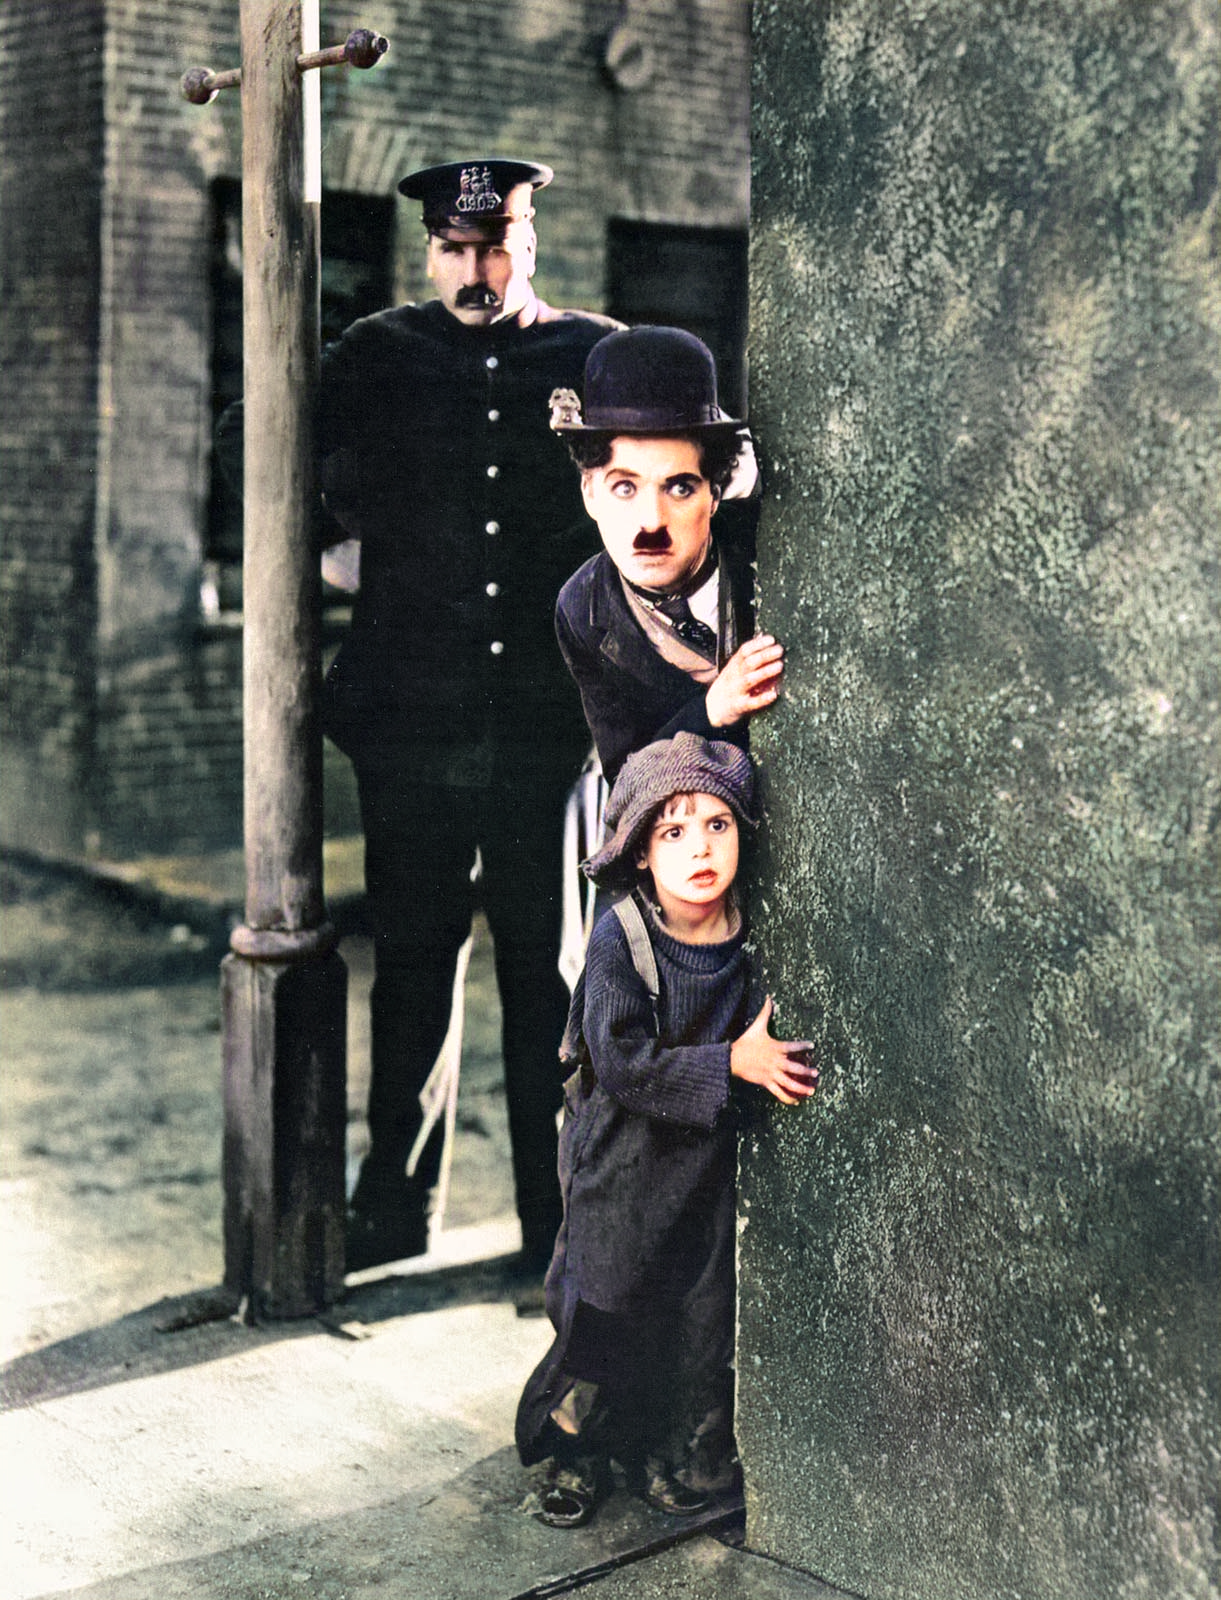

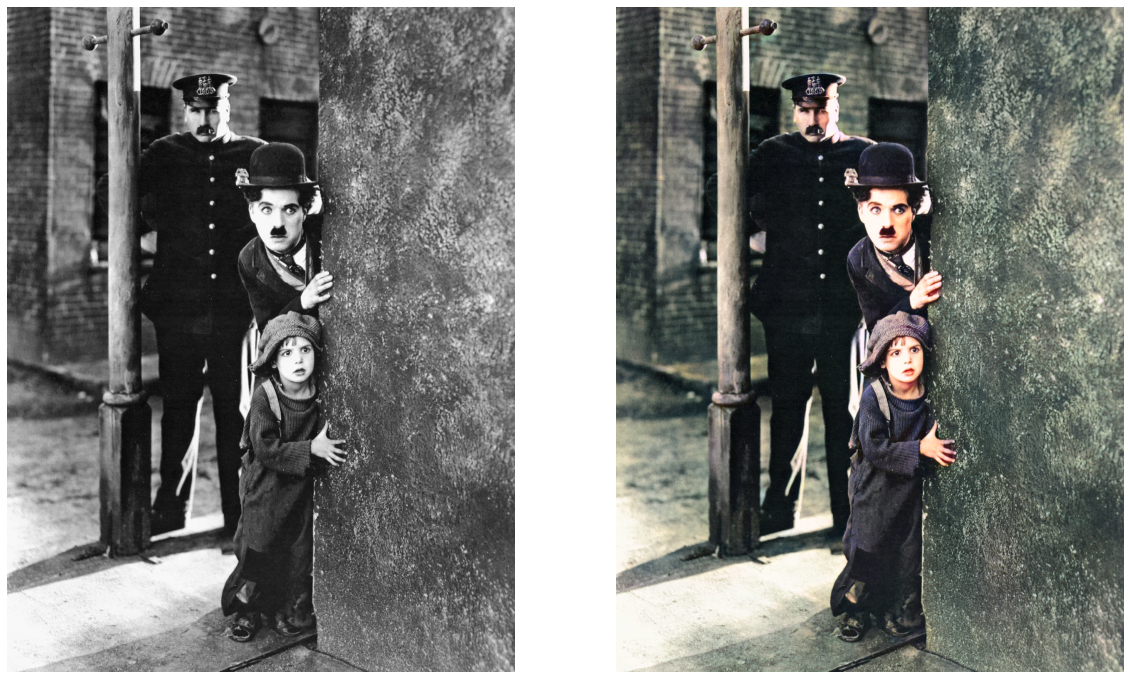

In [ ]:
source_url = 'https://cdn.britannica.com/69/154869-050-2D262EBC/Charlie-Chaplin-Jackie-Coogan-The-Kid.jpg' #@param {type:"string"}
render_factor = 45  #@param {type: "slider", min: 7, max: 45}
watermarked = False #@param {type:"boolean"}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')

In [ ]:
# See how well render_factor values perform on the image here
for i in range(10,45,2):
    colorizer.plot_transformed_image('test_images/image.png', render_factor=i, display_render_factor=True, figsize=(8,8))